In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import pyqosc as qo
import scipy as sp

options = qt.Options(nsteps = int(1e9))
plt.rcParams.update({"font.size" : 13})

In [7]:
def sim_1(vdp, lim = 6, classical_iv = [0.01, 0], classical_finish = None, t_eval = None):

    lindblad = vdp.dynamics()
    
    if not(classical_finish):
        classical_finish = 50 * 2 * np.pi / vdp.omega_0
    
    if not(t_eval):
        t_eval = 0.5 * classical_finish
    
    rho_ss = qo.steady_state(lindblad, plot_wigner = True, xlim=lim, ylim = lim)
    ax = plt.gca()
    timelst,  r, phi, beta = vdp.adler(t_end = classical_finish, t_eval = t_eval, plot = True, 
                            overlap_with=ax, timepoints_returned=10000, init_polar=classical_iv,
                            one_cycle = True)
    
    qo.ss_c_phasedist(rho_ss, r, phi, 50, True)
    ax = plt.gca()
    #qo.ss_q_phasedist(rho_ss, 100, True, ax)
    
    ax.legend(loc = "best")
    
    plt.show()


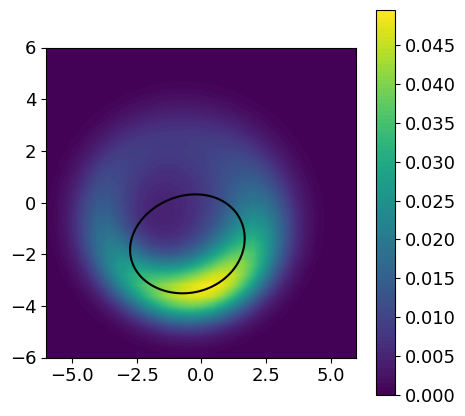

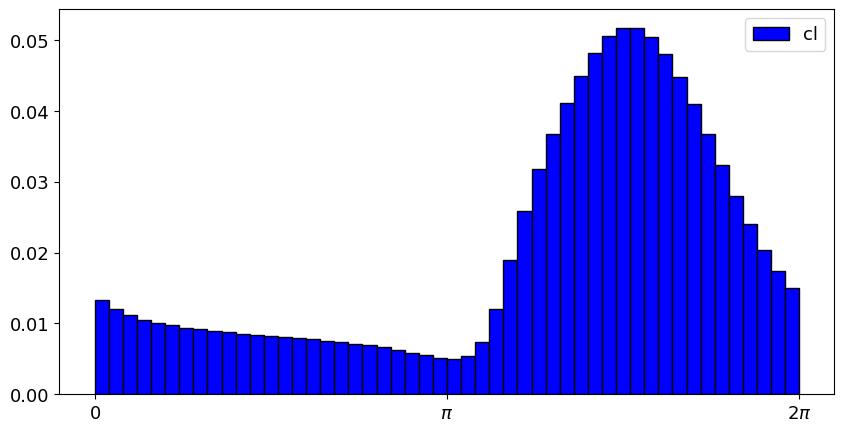

In [8]:
sim_1(qo.vdp(30, 1, 1.7, 1))